# Hacker News Project: determining the best time to post to receive the most comments

## Project #2 in the DataQuest project series

## About Hacker News

Hacker News user-submitted stories (known as "posts") receive votes and comments, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of the Hacker News listings can get hundreds of thousands of visitors as a result.

## Goals for the Project


1. Determine if titles that begin with 'Ask HN' or 'Show HN' receive more comments. 
2. Determine if posts made at a particular time receive more comments on average. 

### Project and format notes

On datasets: The original dataset for this project is here: https://www.kaggle.com/hacker-news/hacker-news-posts
The original dataset contains nearly 300,000 rows of data. I decided to clean, organize and store the original data myself rather than use the cleaned version provided by DataQuest. Since I cleaned the dataset myself, my answers will vary slightly as I do not know the exact steps DataQuest took to clean the dataset that is used in their guided project. After cleaning the original dataset, the final dataset contains about 80,000 lines of data whereas the DataQuest set contains about 20,000 lines of data. In the DataQuest guided project, they said they removed rows of data that had no comments and then randomly removed additional rows to get a final dataset of about 20k lines of data.  

On formatting: The format that you will see below is presented in the following order: 
1. Section
2. Code with comments
3. Printed result (if any)
4. Markdown explaining the code, why/how it works, and any results


## Part 1: Import and clean the Data

### Step 1: import data

In [1]:
#Open the original dataset and put into list of lists
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
opened_file = open('/home/hunter/Jupyter Projects/HN_posts_year_to_Sep_26_2016.csv')
read_file = csv.reader(opened_file)
hn_posts = list(read_file)

#import datetime for later use

from datetime import datetime
from datetime import time

### Step 2: examine data organization

In [2]:
print('The dataset contains', len(hn_posts), 'lines of data')
print()
print(hn_posts[0]) #header row
print()
print(hn_posts[1:3]) #example data

The dataset contains 293120 lines of data

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']

[['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26'], ['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24']]


The original file has almost 300k lines of data. There are 7 total columns of data. The columns that are necessary for the analysis are: 'title', ' num_comments', 'created_at'. These 3 columns will be analyzed to find answers to the two goals listed in the introduction. 

### Step 3: remove articles without comments

In [3]:
#delete rows that have no comments

hn_posts_comments = []

for row in hn_posts[1:]: #remove header
    comments = int(row[4])
    row[4] = comments
    if comments >= 1:
        hn_posts_comments.append(row)

print('After removing rows without comments there are:', len(hn_posts_comments), 'rows remaining')

After removing rows without comments there are: 80401 rows remaining


The above code removed all rows of data that have no comments. We will do the analysis only on articles that do recieve comments. 

### Step 4: check for rows with incomplete data

In [4]:

hn_posts_full = [] #for complete rows
hn_posts_incomplete = [] #for incomplete rows
head_len = len(hn_posts[0])

for row in hn_posts_comments:
    if len(row) != head_len:
        hn_posts_incomplete.append(row)
    else: 
        hn_posts_full.append(row)

print('Rows with complete data:', len(hn_posts_full))
print('Rows with incomplete data:', len(hn_posts_incomplete))

Rows with complete data: 80401
Rows with incomplete data: 0


### Step 5: check for and remove duplicate rows

In [5]:
#check for duplicate data:

duplicates = {}
for row in hn_posts_full:
    identification = row[0]
    if identification in duplicates: 
        duplicates[identification] += 1
    else: 
        duplicates[identification] = 1

for value in duplicates.values():
    if value > 1: 
        print(val)

#testing the code above to make sure it will return the expected value
#test = {'a': 1, 'b': 3, 'c': 0} 
#for val in test.values():
#    if val > 1: 
#      print(val)  

The dataset has no duplicate rows  

### Step 6: establish the final dataset 

In [6]:
headers = hn_posts[0]
hn_fin = hn_posts_full

print(headers)
print()
print(hn_fin[0:5])
print()
print('Final dataset length:', len(hn_fin))

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']

[['12578975', 'Saving the Hassle of Shopping', 'https://blog.menswr.com/2016/09/07/whats-new-with-your-style-feed/', '1', 1, 'bdoux', '9/26/2016 3:13'], ['12578908', 'Ask HN: What TLD do you use for local development?', '', '4', 7, 'Sevrene', '9/26/2016 2:53'], ['12578822', 'Amazons Algorithms Dont Find You the Best Deals', 'https://www.technologyreview.com/s/602442/amazons-algorithms-dont-find-you-the-best-deals/', '1', 1, 'yarapavan', '9/26/2016 2:26'], ['12578694', 'Emergency dose of epinephrine that does not cost an arm and a leg', 'http://m.imgur.com/gallery/th6Ua', '2', 1, 'dredmorbius', '9/26/2016 1:54'], ['12578624', 'Phone Makers Could Cut Off Drivers. So Why Dont They?', 'http://www.nytimes.com/2016/09/25/technology/phone-makers-could-cut-off-drivers-so-why-dont-they.html', '4', 1, 'danso', '9/26/2016 1:37']]

Final dataset length: 80401


The dataset is cleaned and ready for analysis. The data set we will use below is called `hn_fin`. 

## Part 2: Filter the data

In [7]:
#Extract rows that have titles the begin with "ask HN" or "show HN"

hn_ask = [] #for titles beginning w/ 'Ask HN'
hn_show = [] #for titles beginning w/ 'Show HN'
hn_oth = [] #for all other titles

for row in hn_fin: 
    title = row[1]
    tsw = title.startswith('Ask HN') #'tsw' stands for 'title starts with'
    tsw_two = title.startswith('Show HN') 
    if tsw == True: 
        hn_ask.append(row)
    elif tsw_two == True: 
        hn_show.append(row)
    else: 
        hn_oth.append(row) 

#check to see if all lists add to original:

len_ask = len(hn_ask)
len_show = len(hn_show)
len_oth = len(hn_oth)
sumz = len_ask + len_show + len_oth
print(sumz)
print('len_ask:', len_ask)
print('len_show:',len_show)
print('len_oth:', len_oth)

80401
len_ask: 6899
len_show: 5052
len_oth: 68450


In the code block above, I iterated over the cleaned dataset and extracted titles that began with either 'Ask HN', 'Show HN' or others. Then I appended each stored title row into its own respective list for analysis below. 

## Part 3: Analyze the data

### Step 1: find the average comments per post type

In [8]:
#check to see if 'Ask HN' or 'Show HN' gets more comments on average
# 'tot_com' stands for 'total comments'

def avg_comment(li, a): 
    tot_com = 0
    for row in li: 
        tot_com += int(row[a])

    avg_com_cnt = round((tot_com / len(li)), 2)
    
    return avg_com_cnt

The function above will find the average number of comments per post by first finding the sum total of all comments in the list and dividing by then numer of posts in the list. 

In [9]:
ask_avg = avg_comment(hn_ask, 4)
print('ask_avg is:', ask_avg)
show_avg = avg_comment(hn_show, 4)
print('show_avg is:', show_avg)
oth_avg = avg_comment(hn_oth, 4)
print('oth_avg is:', oth_avg)

ask_avg is: 13.76
show_avg is: 9.82
oth_avg is: 25.83


Titles that begin with 'Ask HN' on average recieve more comments than titles that begin with 'Show HN'. Therefore,  the remainder of the data analysis articles that begin with 'Ask HN' will be the focus.

### Step 2: total comments per hour

In [10]:
#Calculate the number of ask posts created in each hour of the day, 
#Calculate the total number of comments per hour.
# 'pph' stands for 'posts per hour'
# 'cph' stands for 'comments per hour'

pph = {} #frequency table for posts per hour
cph = {} #frequency for comments per hour
for row in hn_ask: #parse out and return the hour
    comments = row[4]
    timer = row[6]
    time_one = datetime.strptime(timer, '%m/%d/%Y %H:%M')
    t1 = time_one.time()
    hr = t1.hour #extract the hour from the datetime in row[6]
    if hr in cph:
        cph[hr] += comments
    else:
        cph[hr] = comments #put the hour into the dictionary as the key with comments as value
   
    if hr in pph:
        pph[hr] += 1 
    else: 
        pph[hr] = 1 #put hour in dictioary as key with '1' as value for each post

        
#store dictionary 'comments per hour' as list of tuples, sort list, then print in descending order
cph_store = [(cph[key], key) for key in cph]
cph_sort = sorted(cph_store, reverse=True)
for row in cph_sort:
    hr = row[1]
    comments = row[0]
    table_row = 'Hour {} : comments {}'.format(hr, comments)
    print(table_row)


#store dictionary 'posts per hour' as list of tuples, sort list, then print in descending order
pph_store = [(pph[key], key) for key in pph]   
pph_sort = sorted(pph_store, reverse=True)
for row in pph_sort: 
    hr = row[1]
    posts = row[0]
    table_row = 'Hour {} : post {}'.format(hr, posts)
    print(table_row)   

Hour 15 : comments 18525
Hour 13 : comments 7227
Hour 17 : comments 5547
Hour 14 : comments 4970
Hour 18 : comments 4868
Hour 21 : comments 4500
Hour 20 : comments 4462
Hour 16 : comments 4461
Hour 12 : comments 4234
Hour 19 : comments 3954
Hour 22 : comments 3369
Hour 10 : comments 3013
Hour 2 : comments 2996
Hour 11 : comments 2794
Hour 8 : comments 2362
Hour 4 : comments 2358
Hour 23 : comments 2297
Hour 0 : comments 2265
Hour 3 : comments 2153
Hour 1 : comments 2089
Hour 5 : comments 1838
Hour 6 : comments 1587
Hour 7 : comments 1584
Hour 9 : comments 1477
Hour 15 : post 467
Hour 18 : post 451
Hour 19 : post 420
Hour 16 : post 414
Hour 21 : post 407
Hour 17 : post 404
Hour 20 : post 392
Hour 14 : post 377
Hour 13 : post 324
Hour 22 : post 286
Hour 23 : post 276
Hour 12 : post 274
Hour 11 : post 250
Hour 0 : post 229
Hour 2 : post 227
Hour 1 : post 223
Hour 10 : post 219
Hour 3 : post 211
Hour 8 : post 190
Hour 4 : post 185
Hour 9 : post 176
Hour 6 : post 176
Hour 5 : post 165
Hour 

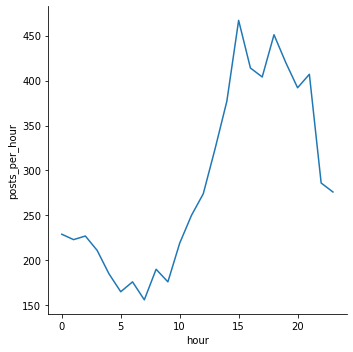

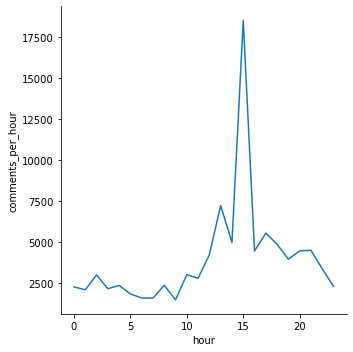

In [23]:
#create a line plot showing posts per hour for both AskHN and ShowHN

pph_sort = dict(sorted(pph.items()))
pph_df = pd.DataFrame(pph_sort.items())
pph_df = pph_df.rename(columns={0:'hour', 1:'posts_per_hour'})

cph_sort = dict(sorted(cph.items()))
cph_df = pd.DataFrame(cph_sort.items())
cph_df = cph_df.rename(columns={0:'hour', 1:'comments_per_hour'})


sns.relplot(data=pph_df, x='hour', y='posts_per_hour', kind='line')

sns.relplot(data=cph_df, x='hour', y='comments_per_hour', kind='line')




In the code block above we first created two dictionaries. `ppp` for posts per hour is a dictionary where the keys are the hours of the day and the values are a frequency table for number of posts that occur in each hour. `cph` for comments per hour is a dictionary where the keys are the hours in a day and the values are the total number of all the comments for each post in that given hour. 

The hours were extracted from the dataset using datetime strptime and time methods. The hours were put into each dictionary. 

After the dictionaries were created, the key, val pairs were converted into a list that was sorted and the sorted results were printed. 

The results obtained in this step show that among posts with titles that begin with 'Ask HN' the top 5 hours that receive the most comments are hours 15, 13, 17, 14, and 18 respectively. 

The hours in which most posts were made were 15, 18, 19, 16, and 21 respectively. 

It is interesting to note that there is a difference between the most posts and the most comments. And the only result where the comments and posts match up is on the first result hour 15. 

### Step 3: find average comment per post per hour

In [25]:
# 'cppph' stands for 'comments per post per hour'

avg_cppph = [[round(cph[k]/pph[k], 2), k] for k in pph if k == k]
avg_cppph = sorted(avg_cppph, reverse = True)

for row in avg_cppph:
    average = row[0]
    hr = row[1]
    print('{} : {:.2f} average comments per post per hour'.format(hr, average))

[[39.67, 15], [22.31, 13], [15.45, 12], [13.76, 10], [13.73, 17], [13.2, 2], [13.18, 14], [12.75, 4], [12.43, 8], [11.78, 22], [11.38, 20], [11.18, 11], [11.14, 5], [11.06, 21], [10.79, 18], [10.78, 16], [10.2, 3], [10.15, 7], [9.89, 0], [9.41, 19], [9.37, 1], [9.02, 6], [8.39, 9], [8.32, 23]]
15 : 39.67 average comments per post per hour
13 : 22.31 average comments per post per hour
12 : 15.45 average comments per post per hour
10 : 13.76 average comments per post per hour
17 : 13.73 average comments per post per hour
2 : 13.20 average comments per post per hour
14 : 13.18 average comments per post per hour
4 : 12.75 average comments per post per hour
8 : 12.43 average comments per post per hour
22 : 11.78 average comments per post per hour
20 : 11.38 average comments per post per hour
11 : 11.18 average comments per post per hour
5 : 11.14 average comments per post per hour
21 : 11.06 average comments per post per hour
18 : 10.79 average comments per post per hour
16 : 10.78 average 

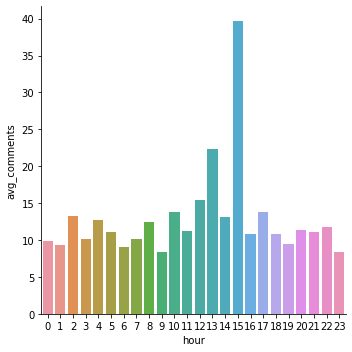

In [44]:
av_com_per_hr = pd.DataFrame(avg_cppph).rename(columns={0:'avg_comments', 1:'hour'})

av_com_per_hr.sort_values(by=(['hour']), inplace=True)

sns.catplot(data=av_com_per_hr, x='hour', y='avg_comments', kind='bar')

## Conclusions: 

Goal 1 was to determine if posts that have titles that begin with 'Ask HN' or 'Show HN' have more popularity. We achieved the answer to this goal. The answer is 'Ask HN' has more popularity over 'Show HN'. The answer was determined by analyzing which posts had more comments on average. One interesting observation is the total number of posts made with either 'Ask' or 'Show' HN. 'Ask HN' posts outnumbered 'Show HN' posts by approximately 1850. It may be worth considering that, although 'Ask HN' posts receive more comments on average, you might have a better chance of writing a more popular post with a 'Show HN' title because there is less competition in that category.  

Goal 2 was to determine what time of day is best to make a post in order to have the highest chance of receiving comments on the posting. According to the data analysis the top 3 times for posting articles with the title starting with 'Ask HN' on Hacker News, is 15:00, 13:00, 12:00 respectively. Keep in mind that all these times are in UTC.

Further analysis should be done on all the other titles that received comments to see if there are similarities that could be leeraged to get even more comments than the 'Ask HN' posts. The number of 'oth' title significantly outnumbers 'Ask' and 'Show' HN posts by an order of magnitude. 
